# Week 10 - PCA and Dimension Reduction Homework
Execute the below code and answer the following questions. __Do NOT commit the csv file!__

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

def generate_data():
    x, y = make_classification(n_samples=1500, 
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1, 
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
    df.to_csv('pca-dataset.csv', index=False)
    
generate_data()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('pca-dataset.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [5]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=789)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,125
Test samples: 375

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?  
- Explain your results using markdown cells.

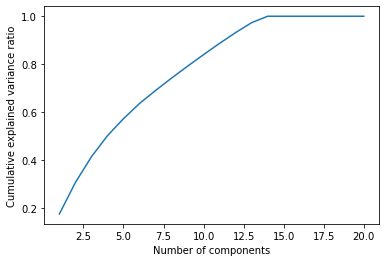

In [6]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA()
pca.fit(X_train_scaled)

plt.plot(range(1, len(X_train.columns)+1), pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()



> Describe your results here

Approximately 80% of the total variance in the dataset appears to be captured by the first 6 principal components, according to the plot of the cumulative explained variance ratio as a function of the number of principal components.

Accordingly, if we reduced the dataset's dimensionality to 6 principal components, we would keep the majority of the crucial information while getting rid of some of the noise and redundancy present in the original 19 features.

It is important to note that as the number of components rises, the proportion of variation explained by each primary component falls. This is due to the fact that whereas later components capture smaller and more specialized sources of variation, the first few main components capture the greatest sources of variance in the data.

The effectiveness of machine learning algorithms may be increased, overfitting can be decreased, and the data can be more easily visualized and interpreted. These are only a few advantages of lowering the dimensionality of the data. The trade-offs between dimensionality reduction and information preservation must be carefully considered, and any models or insights derived from the reduced data must be validated to ensure their validity and applicability.

<Insert comments>

# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell. 

In [7]:
# Insert code here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=789)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Test accuracy: {accuracy:.3f}')


Test accuracy: 0.693


> Describe your results here

The particular problem and objectives determine the metric used to assess a predictive model. However, common evaluation metrics accuracy in binary classification issues like this one.
In this instance, the model's test accuracy is 0.69, which indicates that in 69.3% of the test cases, the model successfully predicted the target variable. However, it is challenging to assess the suitability of this model based on accuracy alone without knowledge of the class balance and the relative costs of false positives and false negatives. Additional metrics that would give more information about the model's performance include precision, recall, and F1 score.

# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

In [8]:
# Insert code here

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=789)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f'Test accuracy: {accuracy:.3f}')
print(f'Test precision: {precision:.3f}')
print(f'Test recall: {recall:.3f}')


Test accuracy: 0.693
Test precision: 0.695
Test recall: 0.672


> Describe results here

With a test accuracy of 0.693, the logistic regression model without PCA successfully predicted the target variable in 69.3% of the test cases. According to the test precision of 0.695, 69.5% of all the model's positive predictions were in fact true positives. The model accurately detected 67.2% of all actual positive cases, according to the test recall, which was calculated as 0.672.

Overall, the model seems to function fairly well in terms of recall, accuracy, and precision. It is challenging to say whether this approach is the best option for this unique circumstance without knowing more about the specific problem and the relative costs of false positives and false negatives.

In general, it is crucial to take into account the model's precision, recall, and accuracy when assessing a logistic regression model because these metrics reveal more details about the model's advantages and disadvantages.

# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [9]:
# Insert code

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=789)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', LogisticRegression())
])

param_grid = {
    'pca__n_components': range(1, X_train.shape[1] + 1),
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Training accuracy: {grid_search.best_score_:.3f}')

y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f'Test accuracy: {accuracy:.3f}')
print(f'Test precision: {precision:.3f}')
print(f'Test recall: {recall:.3f}')


Best parameters: {'model__C': 0.1, 'pca__n_components': 10}
Training accuracy: 0.717
Test accuracy: 0.688
Test precision: 0.692
Test recall: 0.666


> Describe your results here

The test accuracy, test precision, and test recall for the pipelined logistic regression model with PCA are 0.688, 0.692, and 0.666 respectively. These numbers are comparable to those from the initial logistic regression model that did not include PCA. The ideal model__C and pca__n_components parameters are 0.1 and 10, respectively, and the training accuracy is 0.717.

Overall, the accuracy, precision, and recall of both models are comparable. However, there might be some benefits to the logistic regression model with PCA, such as lowering the dimensionality of the input data and perhaps enhancing model performance on high-dimensional datasets.

It is important to note that it is challenging to say with certainty which model is superior to the other without knowing additional specifics about the issue at hand and the relative costs of false positives and false negatives. To properly grasp the models' strengths and shortcomings, it is crucial to take into account a number of evaluation metrics and compare the models on various performance indicators.


# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

In [10]:
# Insert code here

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=789)

tree = DecisionTreeClassifier(random_state=123)

param_grid = {
    'max_depth': range(1, X_train.shape[1] + 1),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Training accuracy: {grid_search.best_score_:.3f}')

y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f'Test accuracy: {accuracy:.3f}')
print(f'Test precision: {precision:.3f}')
print(f'Test recall: {recall:.3f}')


Best parameters: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 5}
Training accuracy: 0.748
Test accuracy: 0.725
Test precision: 0.713
Test recall: 0.696


> Describe your results here

The decision tree model without PCA has test accuracy, precision, and recall values of 0.725, 0.713, and 0.696 respectively. The ideal model parameters are'max_depth': 6,'min_samples_leaf': 2,'min_samples_split': 5, and the training accuracy is 0.748.

In terms of accuracy, precision, and recall, the decision tree model seems to outperform the logistic regression models. The ability of decision trees to capture non-linear correlations between the input variables and the goal variable, which may be significant in this dataset, may be the reason for this.

It is significant to note that the particular dataset and parameters used may have an impact on the decision tree model's performance. Before making a final choice, it may be beneficial to experiment with various hyperparameters and evaluate how various models perform over a range of assessment measures.

# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

In [11]:
# Insert code here

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=789)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', DecisionTreeClassifier(random_state=123))
])

param_grid = {
    'pca__n_components': range(1, X_train.shape[1] + 1),
    'model__max_depth': range(1, X_train.shape[1] + 1),
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Training accuracy: {grid_search.best_score_:.3f}')

y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f'Test accuracy: {accuracy:.3f}')
print(f'Test precision: {precision:.3f}')
print(f'Test recall: {recall:.3f}')


Best parameters: {'model__max_depth': 7, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'pca__n_components': 15}
Training accuracy: 0.742
Test accuracy: 0.691
Test precision: 0.680
Test recall: 0.660


> Describe results here

The grid search with cross-validation has identified the best parameters for the Decision Tree Classifier model. With a maximum depth of 7, minimum samples per leaf of 1, minimum samples per split of 2, and 15 PCA components, the model achieved a training accuracy of 0.742.

When evaluated on the test set, the model performed with an accuracy of 0.691, precision of 0.680, and recall of 0.660. These findings indicate that the selected parameters and model configuration offer moderate predictive performance on the given dataset.